In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing import image
import math
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix

In [0]:
def load_dataset():
    train_dataset = h5py.File('/content/train_happy.h5', "r")
    train = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_label= np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_happy.h5', "r")
    test = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_label= np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train, train_label, test, test_label, classes



To build and train this model, we have gathered pictures of some volunteers in a nearby neighborhood. The dataset is labeled.



In [7]:
train, train_label, test, test_label, classes=load_dataset()

print ("number of training examples = " + str(train.shape[0]))
print ("number of test examples = " + str(test.shape[0]))
print ("X_train shape: " + str(train.shape))
print ("Y_train shape: " + str(test_label.shape))
print ("X_test shape: " + str(test.shape))
print ("Y_test shape: " + str(test_label.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (150,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


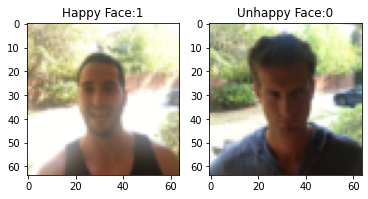

In [21]:
plt.subplot(121)
plt.imshow(train[50])
plt.title('Happy Face:'+str(train_label[50]))
plt.subplot(122)
plt.imshow(train[200])
plt.title('Unhappy Face:'+str(train_label[200]))
plt.show()

## Convolution Neural Network

You will be implementing the building blocks of a convolutional neural network! Each function you will implement will have detailed instructions that will walk you through the steps needed:

- **Convolution functions, including**:
    - Zero Padding
    - Convolve window 
    - Convolution forward
    - Convolution backward 
- **Pooling functions, including**:
    - Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward (optional)

![CNN model](https://images2017.cnblogs.com/blog/937910/201801/937910-20180104002204503-1852269110.png)



### Padding

Zero-padding add any number around the border of an image:

<div>
<img src="https://i0.wp.com/pic3.zhimg.com/v2-ae2ef87c61c841e8ecbebc8848d8e512_r.jpg" width="500">
</div>
The main benefits of padding are the following:

- It allows us to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer. 

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

### Single step of convolution 

In this part, implement a single step of convolution, in which we apply the filter to a single position of the input. This will be used to build a convolutional unit, which: 

- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)

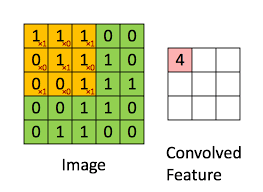
<caption><center> <u> <font color='purple'> <br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>




In a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and we convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias. In this first step of the exercise, you will implement a single step of convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output. 


## Pooling layer 

The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are: 

- Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

<table>
<td>
<img src="https://img-blog.csdnimg.cn/20181130212503614.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80MjQzMjQ2OA==,size_16,color_FFFFFF,t_70" style="width:300px;height:300px;">
<td>

<td>
<img src="https://d1kser01wv8mbw.cloudfront.net/05a3af20ee9ab4f11f65097056c4c2a1_file-746552e4debb18dacee93ea7b7ea849e4a8413b1.png" style="width:300px;height:300px;">
<td>
</table>

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over. 

### Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function. 

As there's no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers don't need to bother with the details of the backward pass. The backward pass for convolutional networks is complicated.

**So we will use Machine Learning Framework** <br>
## Keras

In [0]:
## Model
shape=train.shape[1:]
model=Sequential()
model.add(ZeroPadding2D((3,3)))

## CONV->Normalization->ReLu
model.add(Conv2D(32,(7,7),strides=(1,1),padding='valid'))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))

#MAXPOOL
model.add(MaxPooling2D((2,2),strides=(2,2),padding='valid'))

## CONV->Normalization->ReLu
model.add(Conv2D(64,(7,7),strides=(1,1),padding='valid'))
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))

#MAXPOOL
model.add(MaxPooling2D((2,2),strides=(2,2),padding='valid'))

# Flatten the Image and Convert it into FullyConnected
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


Step:1 ZeroPadding: output shape= (70,70,3)

Step:2 **CONV->Normalization->ReLu**--filter= (7,7,3)--#Channels= 32<br>
After Conv2D: output shape = (64,64,32)<br>
BatchNormalization: output shape = (64,64,32)<br>
Activation: output shape = (64,64,32)<br>

Step:3 **MaxPool**<br>
After Maxpool: output shape = (32,32,32)<br> 

Step:4 **CONV->Normalization->ReLu**--filter= (7,7,32)--#Channels= 64<br>
After Conv2D: output shape = (26,26,64)<br> 
BatchNormalization: output shape = (26,26,64)<br> 
Activation: output shape = (26,26,64)<br> 

Step:5 **MaxPool**<br>
After Maxpool: output shape = (13,13,64)<br> 

Step:6 **Flatten**
After Flattening: output shape= (10816)--Activation='relu'<br>
After Flattening: output shape= (4096)--Activation='relu'<br>
After Flattening: output shape= (10)--Activation='relu'<br>


In [0]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [26]:
model.fit(train,train_label,batch_size=16,epochs=40)

Epoch 1/40
600/600 [==============================] - 32s 54ms/step - loss: 3.3019 - accuracy: 0.6417
Epoch 2/40
600/600 [==============================] - 31s 52ms/step - loss: 0.2953 - accuracy: 0.8733
Epoch 3/40
600/600 [==============================] - 31s 52ms/step - loss: 0.5691 - accuracy: 0.7850
Epoch 4/40
600/600 [==============================] - 31s 52ms/step - loss: 0.2806 - accuracy: 0.8817
Epoch 5/40
600/600 [==============================] - 31s 52ms/step - loss: 0.2032 - accuracy: 0.9217
Epoch 6/40
600/600 [==============================] - 31s 52ms/step - loss: 0.2333 - accuracy: 0.9117
Epoch 7/40
600/600 [==============================] - 31s 52ms/step - loss: 0.2159 - accuracy: 0.9317
Epoch 8/40
600/600 [==============================] - 31s 52ms/step - loss: 0.4116 - accuracy: 0.8667
Epoch 9/40
600/600 [==============================] - 31s 52ms/step - loss: 0.3053 - accuracy: 0.9050
Epoch 10/40
600/600 [==============================] - 31s 52ms/step - loss: 0.135

In [27]:
preds = model.evaluate(test, test_label)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 8ms/step
Loss = 0.11242726922035218
Test Accuracy = 0.9666666388511658


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        100416    
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 64)       

In [0]:
pred=model.predict(test)

In [36]:
roc_auc_score(test_label,pred)

0.9967532467532467

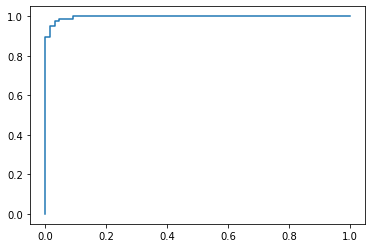

In [39]:
fpr,tpr,threshold=roc_curve(test_label,pred)
plt.plot(fpr,tpr)
plt.show()

The roc curve suggest that the model is good to predict whether face is happy or not